In [1]:
# First let's see what kind of results we can generate without a grid search using only the base parameters.

from sklearn import datasets
from sklearn.linear_model import LogisticRegression

iris = datasets.load_iris()

X = iris['data']
y = iris['target']

logistic = LogisticRegression(max_iter = 10000)

print(logistic.fit(X, y))
print(logistic.score(X, y))
# With the default setting of C = 1, we achieved a score of 0.973.

LogisticRegression(max_iter=10000)
0.9733333333333334


In [2]:
# implementing grid search

from sklearn import datasets
from sklearn.linear_model import LogisticRegression

iris = datasets.load_iris()

X = iris['data']
y = iris['target']

logistic = LogisticRegression(max_iter = 10000)

c = [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2]

scores = []

for choice in c:
  logistic.set_params(C = choice)
  logistic.fit(X, y)
  scores.append(logistic.score(X, y))

print(scores)

[0.9666666666666667, 0.9666666666666667, 0.9733333333333334, 0.9733333333333334, 0.98, 0.98, 0.9866666666666667, 0.9866666666666667]


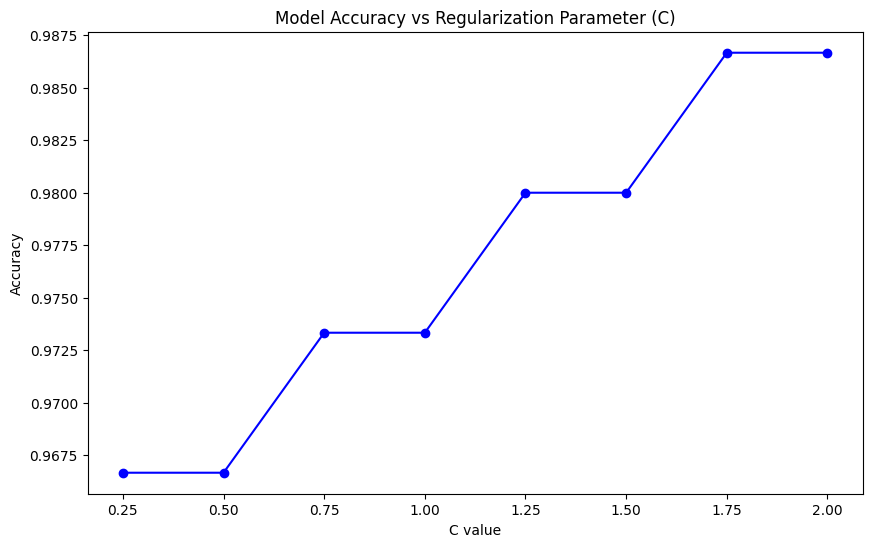

In [8]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

iris = datasets.load_iris()

X = iris['data']
y = iris['target']

logistic = LogisticRegression(max_iter = 10000)

c_values = [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2]

scores = []

for choice in c_values:
  logistic.set_params(C = choice)
  logistic.fit(X, y)
  scores.append(logistic.score(X, y))

plt.figure(figsize=(10, 6))
plt.plot(c_values, scores, marker ='o', linestyle='-', color = 'b')
plt.title('Model Accuracy vs Regularization Parameter (C)')
plt.xlabel("C value")
plt.ylabel("Accuracy")
plt.xticks(c_values)
plt.show()

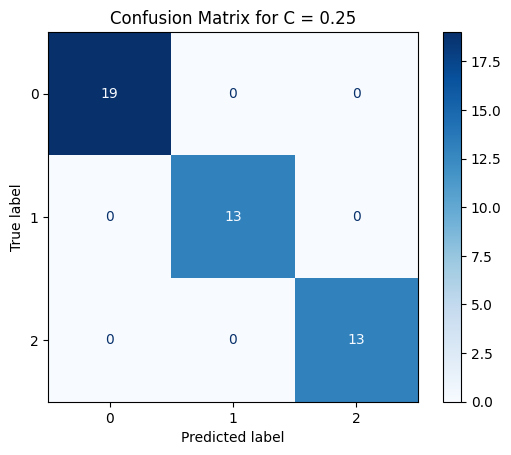

In [11]:

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Load the Iris dataset
from sklearn import datasets
iris = datasets.load_iris()
X = iris['data']
y = iris['target']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the range of C values
C_values = [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2]

# Initialize lists to store train and test accuracies
train_scores = []
test_scores = []

# Train and evaluate model for each C value
for C in C_values:
    model = LogisticRegression(C=C, max_iter=10000)
    model.fit(X_train, y_train)
    train_scores.append(model.score(X_train, y_train))
    test_scores.append(model.score(X_test, y_test))

# Identifying the best C value based on test accuracy

best_C = C_values[np.argmax(test_scores)]
best_model = LogisticRegression(C=best_C, max_iter=10000)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Confusion Matrix for the best C value
cm = confusion_matrix(y_test, y_pred, labels=best_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues')
plt.title(f"Confusion Matrix for C = {best_C}")
plt.show()